#### SKLEARN Datasets - http://scikit-learn.org/stable/datasets/index.html

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()


#### Below is the decription of the dataset

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Name of the columns in the dataset

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

#### Shape of the dataset

In [4]:
boston.data.shape

(506, 13)

#### Separating out the features from the output variable

In [5]:
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

#### Splitting the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

#### Fitting the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Prediction for test data

In [8]:
y_pred = lm.predict(X_test)

#### Plot of Actual values vs Predicted Values (Ideally should be a straight line y=x)

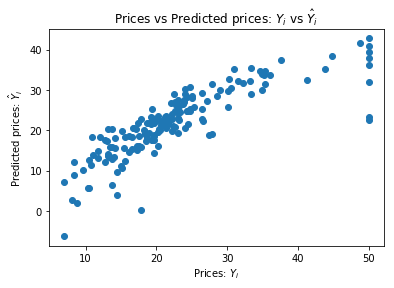

In [9]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Calculating the error for all the test points

In [11]:
delta_y = y_test - y_pred;

#### Plotting the PDF of the error

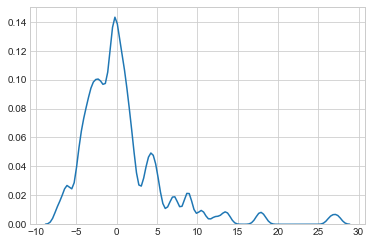

In [12]:
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

#### Observation:
High bump on the negative side.

#### We can also plot absolute value of the error

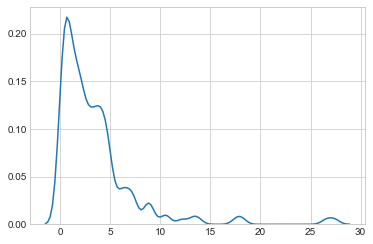

In [13]:
mod_delta_y = abs(y_test - y_pred)
sns.set_style('whitegrid')
sns.kdeplot(np.array(mod_delta_y), bw=0.5)
plt.show()

#### Evaluation using R-squared (Coefficient of Determination)

In [16]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.695538800551
